In [79]:
using PyPlot

In [2]:
h1(x1,x2)=[(2x1^3-4x1*x2+8) (-2x1^2+8x2+8)]' #∇f(x)
h2(x1,x2)=reshape([[6x1^2-4x2 -4x1] [-4x1 8]],(2,2)) # Hesse行列

h2 (generic function with 1 method)

In [3]:
h1(3,1) # 初期値(3,1)^T

2×1 Array{Int64,2}:
 50
 -2

In [4]:
h2(3,1)

2×2 Array{Int64,2}:
  50  -12
 -12    8

In [5]:
h2(3,1)^-1 * -h1(3,1)

2×1 Array{Float64,2}:
 -1.46875
 -1.95313

In [83]:
x0 = [3 1]' # 初期値
a0 = 0.5 # ステップ幅

0.5

In [7]:
d0 = h2(3,1)^-1 * -h1(3,1) # ニュートン方程式に代入した結果

2×1 Array{Float64,2}:
 -1.46875
 -1.95313

In [8]:
x1 = x0 + a0*d0

2×1 Array{Float64,2}:
  1.53125 
 -0.953125

In [9]:
xk = [3 1]'
dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
x = xk + a0*dk

2×1 Array{Float64,2}:
  1.53125 
 -0.953125

In [84]:
x_ims = []
y_ims = []
xk = [3 1]'
for i in 1:10
    dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
    x = xk + a0*dk
    xk = x
    push!(x_ims,x[1])
    push!(y_ims,x[2])
end

In [85]:
x_ims

10-element Array{Any,1}:
  2.26563   
  1.56371   
  0.831668  
 -0.00448438
 -0.769015  
 -1.08967   
 -1.23173   
 -1.29923   
 -1.33219   
 -1.34848   

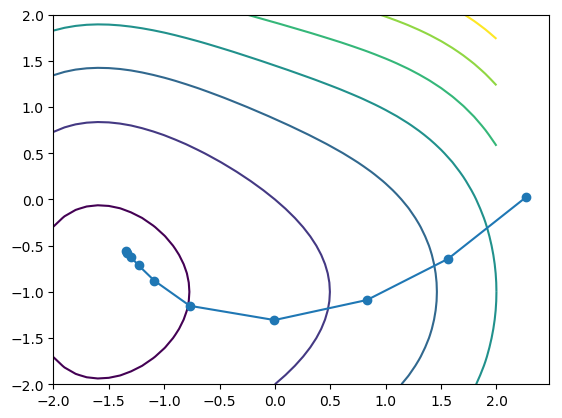

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1344cc828>

In [89]:
f(x1,x2) = 1/2 .* x1.^4 -2(x1.^2)*x2 + 4.*x2.^2 + 8x1 + 8x2
x1,x2 = (collect(-2:0.1:2),collect(-2:0.1:2))
x1_grid = repeat(x1',outer=(length(x2),1))
x2_grid = repeat(x2, outer=(1,length(x1)))
axes()[:contour](x1_grid,x2_grid,f(x1_grid,x2_grid))
axes()[:plot](x_ims,y_ims,marker="o")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAxeVtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjc5NSBhYWE5YWE4IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAEDnZYiEABX//vfJ78Cm61tbtb+Tz0j8LLc+wio/blsTtOoAAAMAAAMABXKZDsLG8fA7TGAAAXwAEJKD+5dLKHgAKOI4iJf6ohJMO4ifKn32QlHkQcjwq09JilCXPJZQzrKeYKltpLC/LvuWxj+zmJYvVw7TihpzrzP/cpr0ESQ1li4s0KCXC2VZUh5bCaebOE8lDnvZstqzGhQt8vPK/BAmfbhXnQjmM8bWiTmLnh7lN76hTMD/FkcLp76X+C7sqdvmFIL8l72Ag9615v+WKO7guCGaclIlrLhpM/ZHMWxArxYnZNjLkprnN6kXz4JAt3VqUZOTmpTXix8MNs0uJjmplC4HZNuJG35EycNrGGZUnE45+YMMmg33oP6FyO0d6kirgGebyifOThAXPKOc1sWHx4ldPAX+U43JntaaJsm4C7+xz1NQdGVXfJ1eJGfs/od33LzBQRUASrB6pJ0LaPtUmlrA2ExF6NaDEvcySN31azHCbHs1VTqc6kkL7pa4PiX2Vs41hjHSfUL1EfUHYWXyyG/fbaNbQjs74awDzgPuU/z1aA5RWURAuHynHtwLo6165nITCaEXksNnstgpfi25/6OnufUr2fgWrtlA77Vd8ft04BcWCe79UkQpyX4unEh5EUJRuLmBkfA1EN0ghx/Feo0Iu4a5KwV+uu0UVlH979+KChruumf4+KHp2BpIMTMtSOvcQzgGUnEbjIX7qfPPap6Jz6PZIUVSjmdInSS1jBlRgXto6oKcioYAa2IcExLAqizCAXkTtSpbU1EfQqNGsRrjGLj/jltOaA5EO+nNR3e5yRLTdmhafVEawzF3YH9wuW+tf7pkjaWbNJK+EkBECXK9nMwe4CrfcfHs6GIvjqL44bgXzzrcMSbaRKTnN97JnELkzcf5SjPLQpqf1eQ5ICST/1Tpg/src9xJRzzSdD2hECB2jQDcLFJoo90CypaDlO9Hpqw9Pgpoi2JSGqVFKpmHUCXVatT7o0gJ3L//OT++JaCb9zHrn33X3pGILOoj7CpZtQUAAf7IJo+TVe2pQMGXgDCAGFPM9lX/eGBUrQqa96+mqXYzElGkaBCfFxAHNQO7jjapkixsosb3oPN8yJY2yTrTVML3+1JBzUiHROQ/6I9h99/tn6Um/i1UuPlmY/tCTRa6NhnYdWxSO+GzyH4SsdN63v3eSqzuNBbFazdpcapvQVTczFrNXP85/oMif5CkcTw/DSeMsBcN4OL/b62MG6gjinmyl2i1mz8zEgHjVKG/K+HnKiLzp6e7o2ReABD9qkQzVkvaHxKFt5ucE6l43g1Uc8CLuvsWwY48SYsiR12NmgJ5S8uSmTUG0XAUFXkaW9CH6nC17kukq0eZQaZCx0t7atyqEMxBM00BwAgSSaimhfQwyugIBLpdV809bLe6HahMC1Qn/LIOYR33U07zX82o72+iXOCH7Ues5Ez6ZfNjLjA+gn7JzooAKhZye9AthmE/Ttuv8fSQJ29/dU1/2y6cpaWXX+9wP/bGn+b2VO47TPhd3EUNw3cfzTYR9sYgIPPmwAX0dQlIMFDvKaQaoQZS1yj6lmA8z1E9wS/9jMktzJi2exckydATDDE4MEY36anG0jKUxQQ8T4NVhutQ9dhPeH+qln3zj7KFsRQETOzBrGCUUTdsHUgw7EHU5Uto8gzSJSDDm/RLIAR1Dl8kXd7woVyaCT88PlVxhgTNkScsDMt6NFvbhnfwrVH3ZwJB3wfaj8iJCZonCX6CKUukrxrw4pmRnnXNg52567V9uTrDn51gW7xxVJbU3obO6EYLuSy5/8oU8g3XLIB5Ck+RSS2Wtr4U0tlOYT6ADrdxWJefJSieTAEMDwTsTgPieDObc8AHor/P9G3Z3NEwzV69487b4VRjaoXIlSdZnoDP5vCD4gYvnm/Y5QEIuKmkzZzIIiOIfEp+ELLcj9c0fs80QCMCqhhiEoQ1iW1R57pDVC5UelFclQud7kiQ/QlKhR3//7Sl4ACQkWb/MdLve3AyGHivdSsL5vZ3j1iI7inucr4bs9roIUOwgLXMGEpOssChiWAB/AGk+MhJ827OzoeAHIq0xFx+IDyOIs///qG2NVCD3M+v1BQMO6qiK+dIJm6gIwda7PZzivqVWOAdegLaKCHiIB0QV5yOneHvctbWOSe+HeM9yfkxFiApmo2bnAnBiF1hguIHM1iNbtIqc+/EV46UuJ5Y/HxeKfsNaZQ8FfWB59QsLrhpgAX4ZhKr7k4VbbQkc+5AkFwhZ/fbZu7bSaIhke9Rn+dCFNgJ8/GkFJQqzA8h9KkaaQD+8H4AEJbLbECLTeSl3TLjx4h5TacjG4zsxwMB1PKmLSEC20D9iHTxw0UZOLtkulsnTHA7RNu2aqz7uJxghESozu6DI4QqqW6jQih2UkIEn75HOQOLUJ+HvcldlE/E0+R72LTXueqKpzprxOQdXRyKRkvQL/VWI+2cPVhRSB5hiXwQSH3mPfyXQFiIElXbqlFZ5s3PFfTAtOQD//j58fI22FoldtvO8tqnazOh7phuxkzBGFbEAa+POUIXlES8B4gwz7l3aRAtoGuHWig/MRroTRLFGRdDmJ2e4FGJwsEMDVYuRD8pKH4l9T5/xlTtlsAZUVg/lDKlkEn2bmUk/TuA67ih36959LEg/WJySGaAWTYTluaWaiP3o1RmI7HNo4tVUepBcGSaaUlRyuY4QbJkoEr1se4tH3f9g+cBx/jRErGy/c/FdEofHW1+rFDBa1ZWKb2PCuo3HCLUFIeAz/fc3DTay8dtpWgY97+GFW375/t4XeE26p4O90l2F/Ne0MRfnKu0hU593I/cddNK+dueaYAd/hbR0WYYXrUmx2J4zUtgikrs+oREZzohAQ6TozSM6y//uUUZpp2vX3/W3QVy/29jx8Yw2rQgJ8+tQwb2MMk1KIcH9Sp+FD+Xigu2LzPPvazDVbBCQpTTRIPv6LUAXjH0Bz1

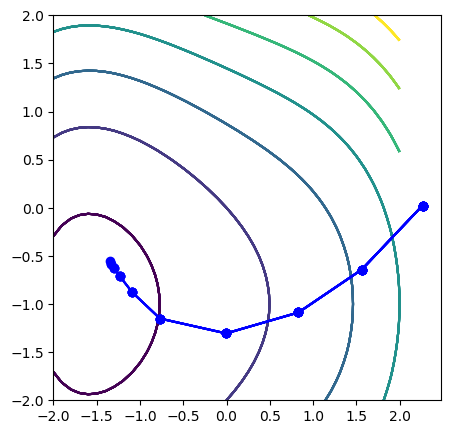

In [102]:
using PyCall
@pyimport matplotlib.animation as anim

# Define the init function, which draws the first frame (empty, in this case)
function init()
    global x_ims
    global y_ims
    global xk
    x_ims = []
    y_ims = []
    xk = [3 1]'
    return (x_ims,y_ims,xk,Union{})  # Union{} is the new word for None
end

# Animate draws the i-th frame, where i starts at i=0 as in Python.
function animate(i)
    global x_ims
    global y_ims
    global xk

    dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
    x = xk + a0*dk
    xk = x
    push!(x_ims,x[1])
    push!(y_ims,x[2])
    
    f(x1,x2) = 1/2 .* x1.^4 -2(x1.^2)*x2 + 4.*x2.^2 + 8x1 + 8x2
    x1,x2 = (collect(-2:0.1:2),collect(-2:0.1:2))
    x1_grid = repeat(x1',outer=(length(x2),1))
    x2_grid = repeat(x2, outer=(1,length(x1)))
    axes()[:contour](x1_grid,x2_grid,f(x1_grid,x2_grid))
    axes()[:plot](x_ims,y_ims,marker="o",color="blue")
    return (x_ims,y_ims,xk,Union{})
end

fig = figure("MyFigure",figsize=(5,5))
# Create the animation object by calling the Python function FuncAnimaton
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=10, interval=500)

# Convert it to an MP4 movie file and saved on disk in this format.
myanim[:save]("test1.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
#myanim[:save]("test1.gif",writer="imagemagick")


# Function for creating an embedded video given a filename
function html_video(filename)
    open(filename) do f
        base64_video = base64encode(f)
        """<video controls src="data:video/x-m4v;base64,$base64_video">"""
    end
end

# Display the movie in a Julia cell as follows. Note it has animation controls for the user.
display("text/html", html_video("test1.mp4"))

# 準ニュートン法

In [137]:
f(x1,x2) = (1/2) * x1^4 -2x1^2*x2+4x2^2+8x1+8x2
h1(x1,x2)=float.([(2x1^3-4x1*x2+8) (-2x1^2+8x2+8)]') #∇f(x)
# 初期値は以下とする
x0 = [3 1]'

ϵ = 0.002
c1 = 0.01
α = 5
p = 0.5

B0 = [1.0 0.0;0.0 1.0]
"""
if h1(xk[1], xk[2]) < ϵ
    return xk
end
"""

# d0 = h1(3,1)' * -Bk^-1
d0 = - h1(x0[1],x0[2])'

d0

バックトラック法（アルミホの方法）を用いる  
$l_k(\alpha)\leq f_k +c_1<\nabla f_k, d_k>\alpha$が満たされていれば$\alpha_k = \alpha$として出力する

In [138]:
l = xk + d0'*α 

for i in 1:20
    if f(l[1], l[2]) <= f(x0[1],x0[2])+c1*dot(h1(x0[1],x0[2]),d0)*α
        return ak = α
    else
        α = p*α
    end
    print(i)
end

1234567891011121314151617181920

In [130]:
x1 = x0 + ak*d0'

2×1 Array{Float64,2}:
 2.5 
 1.02

In [131]:
sk = x1 + x0
yk = h1(x1[1],x1[2])-h1(x0[1],x0[2])
B1 = B0 - (B0*sk)*(Bk*sk)'/(dot(B0*sk,sk)) + (yk*yk')/(dot(yk,sk))

2×2 Array{Float64,2}:
 -4.10983   0.818831
  0.818831  0.572491

In [139]:
l

2×1 Array{Float64,2}:
 -200.0
    8.0

In [140]:
x0

2×1 Array{Int64,2}:
 3
 1